<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_ncns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [3]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Imports**

In [4]:
# Imports
import sys
import torch

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
importlib.reload(cifar10_module)
from data.cifar10 import load_cifar10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [5]:
train_loader, _ = load_cifar10(batch_size=128)

100%|██████████| 170M/170M [00:03<00:00, 49.1MB/s]


In [9]:
import matplotlib.pyplot as plt

# Convert to HWC for plotting
def show_img(img):
  if img.dim() == 4:
      img = img[0]
  img = img.detach().cpu()
  img = img.clamp(0,1)
  img = img.permute(1,2,0)  # CHW -> HWC
  plt.figure(figsize=(4,4))
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  plt.show()

In [21]:
from models.scorebased_models.sde_diffusion import SDEDiffusion
from utils.get_device import get_device
from train.train import Train
from utils.checkpointer import Checkpointer

device = get_device()

model = SDEDiffusion(sde_type='VPSDE', device=device).to(device)

✓ CUDA is available
  Device: Tesla T4
  Device count: 1
  CUDA version: 12.6
Config file configs/ncsn.yaml not found. Using default parameters.


In [22]:
print(device)

cuda


In [23]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/sde"
checkpointer = Checkpointer(checkpoint_dir, "sde", 1, False)
train = Train(model, 10, train_loader, checkpointer, device)
train.load_checkpoint()

No checkpoints found.


In [24]:
print(model.device)

cuda


In [25]:
train.train()

Epoch: 1  {'total_loss': 642144.3502237851}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ncsn/ncsn_epoch_1.pt
Epoch: 2  {'total_loss': 535735.3964194374}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ncsn/ncsn_epoch_2.pt
Epoch: 3  {'total_loss': 449851.7420076726}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ncsn/ncsn_epoch_3.pt
Epoch: 4  {'total_loss': 419178.4389785806}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ncsn/ncsn_epoch_4.pt
Epoch: 5  {'total_loss': 382128.25363650895}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ncsn/ncsn_epoch_5.pt
Epoch: 6  {'total_loss': 374268.16020620207}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ncsn/ncsn_epoch_6.pt
Epoch: 7  {'total_loss': 360190.0382432864}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ncsn/ncsn_epoch_7.pt
Epoch: 8  {'total_loss': 354625.5605418798}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/ncsn/ncsn_epoch_8.pt
Epoch:

[{'total_loss': 642144.3502237851},
 {'total_loss': 535735.3964194374},
 {'total_loss': 449851.7420076726},
 {'total_loss': 419178.4389785806},
 {'total_loss': 382128.25363650895},
 {'total_loss': 374268.16020620207},
 {'total_loss': 360190.0382432864},
 {'total_loss': 354625.5605418798},
 {'total_loss': 341914.2529571611},
 {'total_loss': 332804.703125}]

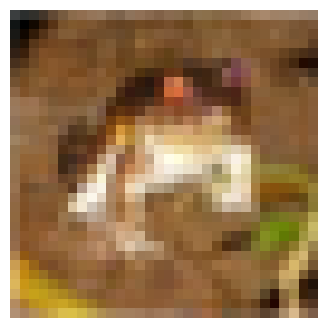

In [26]:
train_dataset = train_loader.dataset
img = train_dataset[0][0]
show_img(img)

In [27]:
gen_img = model.sample(128)

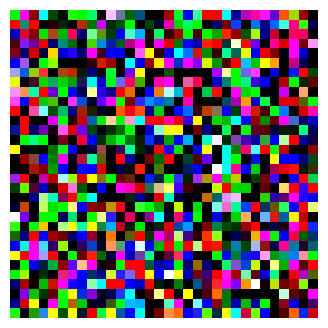

In [29]:
show_img(gen_img)